## Notes for ML4trading at [Udacity](https://www.udacity.com/course/progress#!/c-ud501)

### 1. Pandas basics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a dataframe
data = pd.DataFrame(np.random.rand(10, 3), columns=['a', 'b', 'c'])

# show the head and tail of the data
print 'Head'
print data.head()
print 'Tail'
print data.tail()

Head
          a         b         c
0  0.162430  0.056482  0.826769
1  0.374697  0.963277  0.315079
2  0.878218  0.206650  0.111209
3  0.683753  0.000574  0.024588
4  0.422772  0.233300  0.197009
Tail
          a         b         c
5  0.871488  0.389492  0.835224
6  0.553953  0.652801  0.578104
7  0.063326  0.896978  0.567104
8  0.195174  0.400395  0.904890
9  0.225400  0.664027  0.843356


<function matplotlib.pyplot.show>

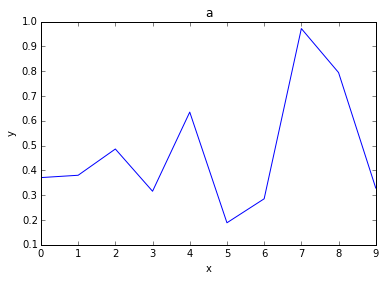

In [11]:
# plot dataframe
%matplotlib inline
data['a'].plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('a')
plt.show()

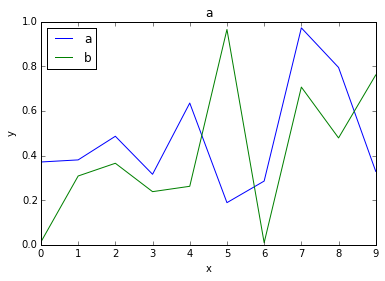

In [12]:
# plot two variables together
data[['a', 'b']].plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('a')
plt.show()

                   SPY       APPL         IBM         GLD
2010-01-04  100.920510  28.466830  116.564610  109.800003
2010-01-05  101.187656  28.516046  115.156514  109.699997
2010-01-06  101.258898  28.062460  114.408453  111.510002
2010-01-07  101.686341  28.010584  114.012427  110.820000
2010-01-08  102.024729  28.196808  115.156514  111.370003
                 APPL         IBM
2010-01-04  28.466830  116.564610
2010-01-05  28.516046  115.156514
2010-01-06  28.062460  114.408453
2010-01-07  28.010584  114.012427
2010-01-08  28.196808  115.156514


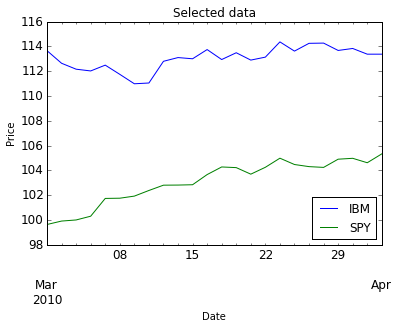

SPY     102.492342
APPL     34.563297
IBM     117.257482
GLD     120.069762
dtype: float64
SPY     5.318360
APPL    4.995623
IBM     6.899651
GLD     9.537110
dtype: float64
SPY     101.713055
APPL     34.193850
IBM     114.529931
GLD     118.754998
dtype: float64


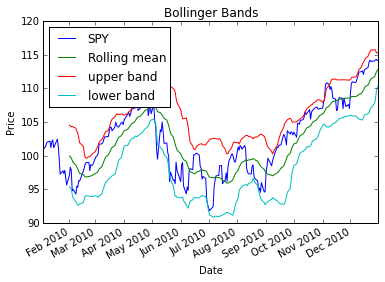

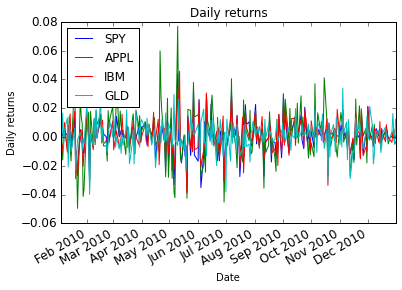

2.15244626832
           SPY      APPL       IBM       GLD
SPY   1.000000  0.708686  0.781873  0.186382
APPL  0.708686  1.000000  0.606461  0.196158
IBM   0.781873  0.606461  1.000000  0.153023
GLD   0.186382  0.196158  0.153023  1.000000


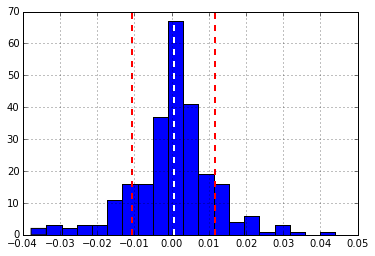

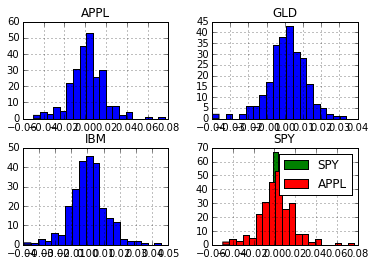

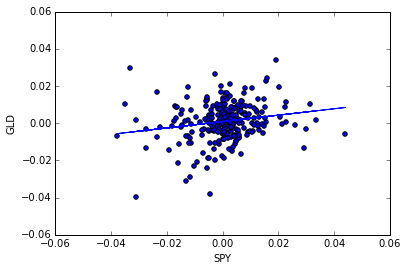

In [28]:
# read stock data
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        # set Date as index, load Date and Adj Close
        # set nan as not a number
        df_tmp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
               parse_dates=True, usecols=['Date', 'Adj Close'],
               na_values=['nan'])
        # rename column name
        df_tmp = df_tmp.rename(columns={'Adj Close':symbol})
        # join the dataframe
        # left: use calling frame’s index
        # right: use input frame’s index
        # outer: form union of indexes
        # inner: use intersection of indexes
        df = df.join(df_tmp)
        # drop dates that SPY did not trade
        if symbol == 'SPY': 
            df = df.dropna(subset=['SPY'])
    return df

def plot_data(df, title='Stock prices', xlabel="Date", ylabel="Price"):
    '''Plot stock prices'''
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    plot_data(df.ix[start_index:end_index, columns], title='Selected data') 

def normalize_data(df):
    '''Normalzie stok prices using the first row of dataframe'''
    return df / df.ix[0, :]

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # Compute and return rolling standard deviation
    return pd.rolling_std(values, window)


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    r_df = df.copy()
    # Need to use .values, because Pands tries to match indices
    # when doing elmentwise operation.
    # r_df.ix[1:, :] = df.ix[1:, :].values / df.ix[0:-1, :].values -1
    
    # Another way of computing daily return
    # .shift(): Shift index by desired number of periods with an optional time freq
    r_df = (df / df.shift(1)) - 1
    
    r_df.ix[0, :] = 0
    return r_df


def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    # Fill forward first, and then fill backward.
    # Interpolation will give us future information, which is not we want.
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)
    return df_data

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['APPL', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
        
    # Slice data by row range (dates) using .ix[]
    # .loc is primarily label based
    # .iloc is primarily integer based
    # .ix is mixed of .iloc and .loc
    print df.ix['2010-01-01':'2010-01-10']
    
    # Slice by column (symbols)
    #print df[['APPL', 'IBM']]
    print df.ix['2010-01-01':'2010-01-10', ['APPL', 'IBM']]

    # Slice and plot
    plot_selected(df, ['IBM', 'SPY'], '2010-03-01', '2010-04-01')
    
    # get the mean, std, median for each column
    print df.mean()
    print df.std()
    print df.median()
    
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    # plot a histogram
    daily_returns['SPY'].hist(bins=20)
    # add mean and std
    rmean = daily_returns['SPY'].mean()
    rstd = daily_returns['SPY'].std()
    plt.axvline(rmean, color='w', linestyle='dashed', linewidth=2)
    plt.axvline(rmean - rstd, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(rmean + rstd, color='r', linestyle='dashed', linewidth=2)
    
    # compute kurtosis
    print daily_returns['SPY'].kurtosis()
    
    # plot histogram on same figure
    daily_returns.hist(bins=20)   # this will give 4 subplots
    daily_returns['SPY'].hist(bins=20, label='SPY')  # this gives one plot
    daily_returns['APPL'].hist(bins=20, label='APPL')
    plt.legend(loc='upper right')
    
    # scatterplot 
    daily_returns.plot(kind='scatter', x='SPY', y='GLD')
    # linear regression
    beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY']+alpha_GLD)
    
    # get correlation
    print daily_returns.corr(method='pearson')


if __name__ == '__main__':
    test_run()
    

### 2. NumPy

In [5]:
import numpy as np

print 'An empty array'
print np.empty((3, 3))
print 'An one array'
print np.ones((2, 3), dtype=np.int_)
print 'An zero array'
print np.zeros((2, 3))

An empty array
[[ 0.01388889  0.          0.        ]
 [ 0.          0.01388889  0.        ]
 [ 0.          0.          1.        ]]
An one array
[[1 1 1]
 [1 1 1]]
An zero array
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [9]:
# generate random numbers
print np.random.random((5, 4))
print np.random.normal(loc=10, scale=5, size=(2,3)) # mean=10, std=5
print np.random.randint(0, 10, size=5)  # 5 random intergers in [0, 10)
print np.random.randint(0, 10, size=(2,3))

[[ 0.03429145  0.66689751  0.67874099  0.10274971]
 [ 0.74434825  0.52170872  0.29924024  0.47529652]
 [ 0.79790594  0.88859     0.23095237  0.02568055]
 [ 0.32213697  0.15187335  0.96619592  0.66557086]
 [ 0.12139442  0.80484822  0.29804202  0.4406897 ]]
[[ 13.83347501   9.96672831   5.21777803]
 [ 16.77691108   8.09480143  11.12500916]]
[2 0 8 2 6]
[[7 2 9]
 [0 5 3]]


In [14]:
# shape of array
# numpy.ndarray.shape: Dimensions (height, width, ...)
# numpy.ndarray.ndim: No. of dimensions = len(shape)
# numpy.ndarray.size: Total number of elements
# numpy.ndarray.dtype: Datatype

np.random.seed(693)  # seed the random number generator

a = np.random.random((4, 3))
print a.shape[0]   # number of rows
print a.shape[1]   # number of columns
print len(a.shape) # dimension of a
print a.ndim       # dimension of a
print a.size       # total number of elements
print a.dtype      # array data type

4
3
2
2
12
float64


In [18]:
# Operations on array

print a.sum(axis=0)  # sum each column
print a.sum(axis=1)  # sum each row
print a.sum()        # sum all
print a.min(axis=0)  # minmum of each column
print a.mean()       # mean all

[ 1.93905112  2.5616168   2.22517474]
[ 2.30925706  1.5581874   0.90651897  1.95187922]
6.72584265639
[ 0.13393385  0.30360608  0.01771487]
0.560486888033


In [32]:
# sorting, searching and counting
# http://docs.scipy.org/doc/numpy/reference/routines.sort.html
np.random.seed(0)
a = np.random.random((2, 5))
print np.sort(a, axis=0, kind='quicksort')  # sort along column
print np.sort(a, axis=None)  # sort as a list

# searching
print np.argmax(a)  # return the index of maximum value along certain axis
print np.argmax(a, axis=1)
print np.nanargmax(a)              # ignor NaNs
print np.where(a > a[1, 2])        # reutrn index under certain condition
print np.extract( a > a[1, 2], a)  # extract the elements under condition

[[ 0.5488135   0.43758721  0.60276338  0.54488318  0.38344152]
 [ 0.64589411  0.71518937  0.891773    0.96366276  0.4236548 ]]
[ 0.38344152  0.4236548   0.43758721  0.54488318  0.5488135   0.60276338
  0.64589411  0.71518937  0.891773    0.96366276]
8
[1 3]
8
(array([1]), array([3]))
[ 0.96366276]


In [1]:
# timing the speed
from time import time
import numpy as np

def how_long(func, *args):
    '''Execute function with given arguments, and measure execute time'''
    t0 = time()
    result = func(*args)
    t1 = time()
    return result, t1-t0

def manual_mean(arr):
    '''Compute mean of all elements in the given 2D array'''
    sum = 0
    for i in xrange(0, arr.shape[0]):
        for j in xrange(0, arr.shape[1]):
            sum = sum + arr[i, j]
    return sum / arr.size

def numpy_mean(arr):
    '''Comopute mean using Numpy'''
    return arr.mean()

def test_run():
    '''Function called by test run'''
    nd1 = np.random.random((1000, 10000)) # use a large array
    
    # Time the two functions
    res_manual, t_manual = how_long(manual_mean, nd1)
    res_numpy, t_numpy = how_long(numpy_mean, nd1)
    print 'Manual: {:.6f} ({:.3f} secs. ) vs Numpy: {:.6f} ({:.3f} secs)' \
          .format(res_manual, t_manual, res_numpy, t_numpy)
    
    # make sure the results are almost the same
    assert abs(res_manual - res_numpy) <= 10e-6, 'Results not equal.'

if __name__ == '__main__':
    test_run()

Manual: 0.499937 (2.335 secs. ) vs Numpy: 0.499937 (0.020 secs)


In [8]:
# Access array elements

def test_run():
    a = np.random.rand(5, 4)
    print a
    print a[1, 0:4:2]  # get 2nd row, from column 0 to 3 every 2 columns
    
    a = np.random.rand(5)
    indices = np.array([1,1,2,3])
    print a
    print a[indices]   # give elements accroding to the indices
    
    # masking
    print a[a < a.mean()]
    
    
    
if __name__ == '__main__':
    test_run()

[[ 0.92744409  0.16532876  0.74651683  0.17762802]
 [ 0.12140913  0.28967956  0.45698212  0.73748628]
 [ 0.25504682  0.52520241  0.95004963  0.17814654]
 [ 0.80781425  0.40286974  0.30635148  0.3304205 ]
 [ 0.10545764  0.9172139   0.93817504  0.05517623]]
[ 0.12140913  0.45698212]
[ 0.7669694   0.11924459  0.57883027  0.3499312   0.53484266]
[ 0.11924459  0.11924459  0.57883027  0.3499312 ]
[ 0.11924459  0.3499312 ]


In [10]:
# Arthmetic operations
# numpy.add: Element-wise addition, same as + operator
# numpy.subtract: Element-wise subtraction, same as -
# numpy.multiply: Element-wise multiplication, same as *
# numpy.divide: Element-wise division, same as /
# numpy.dot: Dot product (1D arrays), matrix multiplication (2D)

from __future__ import division

a = np.array([(1, 1, 2, 3), (2, 3, 4, 5)])
print a
print a / 2

[[1 1 2 3]
 [2 3 4 5]]
[[ 0.5  0.5  1.   1.5]
 [ 1.   1.5  2.   2.5]]


### 3. Statistical Analysis of time series

* Bollinger Bands: rolling_mean $\pm$ 2\*rolling_std 
* Daily returns: $r(t) = \frac{price(t)}{price(t-1)} - 1$
* Cumulative returns: $cr(t) = \frac{price(t)}{price(0)} - 1$
* Missing data: fill forward, then fill backward (because interpolation would give future information)
* Kurtosis: fat tails leads to positive values; skinny tails leads to negative values.
* Daily portfolio value: <img src='daily_portfolio_value.png' style="width: 60%; height: 60%"/>
* Portfolio statistics: <img src='portfolio_statistics.png' style="width: 60%; height: 60%"/>
* Sharpe Ratio: risk adjusted return <img src='sharpe_ratio.png' style="width: 60%; height: 60%"/>

$SR_annualized = K *SR$; 

$K =  \sqrt{number\_of\_samples\_per\_year}  $; 

daily:$K=\sqrt{252}$; 

weekly: $K=\sqrt{52}$; 

monthly: $K=\sqrt{12}$

### 4. Optimization

In [34]:
'''Minimize an objective function using SciPy'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
    '''GIven a scalar X, return some value'''
    Y = (X - 1.5)**2 + 0.5
    print 'X = {}, Y = {}.'.format(X, Y)
    return Y

def test_run():
    Xguess = 2.0
    min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
    print 'Minima found at:'
    print 'X = {}, Y = {}.'.format(min_result.x, min_result.fun)
    
if __name__ == '__main__':
    test_run()

X = [ 2.], Y = [ 0.75].
X = [ 2.], Y = [ 0.75].
X = [ 2.00000001], Y = [ 0.75000001].
X = [ 0.99999999], Y = [ 0.75000001].
X = [ 1.5], Y = [ 0.5].
X = [ 1.5], Y = [ 0.5].
X = [ 1.50000001], Y = [ 0.5].
Optimization terminated successfully.    (Exit mode 0)
            Current function value: [ 0.5]
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [ 1.5], Y = [ 0.5].


### 5. Computitional Investing
* Types of Funds:
  * ETF: Buy/sell like stocks; baskets of stocks; transparent.
  * Mutual Fund: Buy/sell at end of day; quarterly disclosure; less transparent.
  * Hedge fund: Buy/sell by agreement; no disclosure; not transparent.
* Incentives: How are they compensated?
  * ETF: expense ratio 0.01% assets + 1.00% profits
  * Mutual fund: expense ratio 0.5% assets + 3.00% profits
  * Hedge fund: 2% assets + 20% profits
* How funds attract investors?
  * Who?
    * Individuals
    * Institutions
    * Funds of funds
  * Why?
    * Track record
    * Simulation + story
    * Good porfolio fit
* Hedge fund goals and metrics:
  * Goals:
    * Beat a benchmark (e.g. SP500)
    * Absolute return
  * Metrics:
    * Cumulative return = (value[-1]/value[0])-1
    * Volatility = STD of daily_return
    * Risk/Reward (e.g. Sharpe Ratio)
* Computing inside a hedge fund: <img src='hedge_fund_computing1.png' style="width: 60%; height: 60%"/> <img src='hedge_fund_computing2.png' style="width: 60%; height: 60%"/> <img src='hedge_fund_computing3.png' style="width: 60%; height: 60%"/>
* What is in an order? Buy or sell; symbols; number of shares; limit or market; price
* How orders go to exchange? <img src='orders2exchange.png' style="width: 60%; height: 60%"/>
* How hedge funds exploit market mechanics? 
<img src='hedge_market1.png' style="width: 60%; height: 60%"/> <img src='hedge_market2.png' style="width: 60%; height: 60%"/>
* Order types
   * Exchanges
      * Buy, sell
      * Market, limit
   * Broker
      * Stop loss
      * Stop gain
      * Trailing stop
      * Sell short
* What is a company worth? $PresentValue = \frac{FutureValue}{(1+interest rate)^i}$
   * Intrinsic value: dividends/discount_rate
   * Book value: assets - liability
   * Market capitalization: number of stocks * stock price
* CAPM: $r_{i}(t)=\beta_{i}r_{m}(t)+\alpha_{i}(t)$
   * Passive management: buy index and hold
   * Active management: pick stocks
   * CAPM for portfolios: $r_p(t)=\sum_i\omega_i(\beta_ir_m(t)+\alpha_i(t))=\beta_pr_m(t)+\alpha_p(t)$
   * CAPM for hedge funds: 
      * Assuming information leads to $\alpha_i$; 
      * CAPM enables to minimize market risk $\beta_p = 0$ by choosing $\omega_i$, while keeps the $\alpha_i$.
* Characteristics of technical analysis
   * What it is
      * use historical price and volume only
      * compute statistics called indicators
      * indicators are heuristics
   * Why it might work
      * there is information in price
      * heuristics work
   * When is technical analysis effective?
      * Individual indicators weak
      * Combinations stronger
      * Look for contrasts (stock vs market)
      * shorter time periods
  * Some good indicators: 
      * momentum = price[t]/price[t-n] -1
      * simple moving average (SMA) = price[t]/ (mean of price n-t to t) -1
      * Bollinger Bands = $\frac{price(t)-SMA(t)}{2std(t)}$
* Stock splits: decrease price, increase liquidity; but gives shocks of price data, soultion is using adjusted price.
* Dividens also needs to be adjusted
* Be careful with **Survivor Bias**: use survivor bias free data
* Efficient Market Hypothesis (EMH):
   * Assumptions:
       * Large number of investors
       * New information arrives randomly
       * Prices adjust quickly
       * Prices reflect all available information
   * Where does information come from?
       * Price/Volume
       * Fundamental
       * Exogenous
       * Company insiders
   * 3 forms of the EMH
       * Weak: future price cannot be predicted by analyzing historical prices
       * Semi-strong: prices adjusted quickly to new public information
       * Strong: prices reflect all information public and private
* Grinold's Fundamental Law: performance = skill * $\sqrt{breadth}$ (IR = IC*$\sqrt{BR}$)
    * Information Ratio (IR) = $\frac{mean(\alpha_p(t))}{std(\alpha_p(t))}$, like Sharpe ratio of excess return
    * Information Coefficient (IC) is correlation of forecasts to return
    * Breadth (BR) is number of trading oppertunities per year
* Harry Markowitz: can get lower std than any std of the stocks in the portfolios by choosing different stocks considering the importance of covariances
    * Mean Variance Optimization (MVO)
        * Inputs: Expected return; volatility; covariance; target return
        * Output: Asset weights for portfolio tha minimize risk
    * The Efficient Frontier: best return given certain risk

### 6. Machine Learing for Trading
* Supervised regression learning
    * Linear regression (parametric: y=mx+b)
    * K nearest neighbor (KNN) (instance based: keep the data)
    * decision tree
    * decision forest
* Problems with regression
    * nosiy and uncertain
    * challenging to estimate confidence
    * holding time, allocation
* Ensemble learners
    * Bagging (Bootstrap aggregating): randomly choose (typically <60%) from train data  with replacement
    * Boosting (e.g. Ada(adaptive) Boost): similar as Bagging, but with more weight on the data with large error for each choosing; more likely to overfit than Bagging.
* Reinforcement Learning (RL) <img src='RL1.png' style="width: 60%; height: 60%"/> <img src='RL2.png' style="width: 60%; height: 60%"/><img src='RL3.png' style="width: 60%; height: 60%"/><img src='RL4.png' style="width: 60%; height: 60%"/><img src='RL5.png' style="width: 60%; height: 60%"/>
* Q-learning <img src='QL1.png' style="width: 60%; height: 60%"/> <img src='QL2.png' style="width: 60%; height: 60%"/> <img src='QL3.png' style="width: 60%; height: 60%"/> <img src='QL4.png' style="width: 60%; height: 60%"/>
    * Two finer points
        * Success depends on exploration
        * Choose random action with probability c (e.g. 0.3)
    * The trading problem: state
        * ratio of Adjusted close/SMA
        * Bollinger Band value
        * P/E ratio
        * Holding stock
        * Return since entry
    * Create the state
        * State is an integer
        * Discretize each factor
        * Combine all integer into a single number
    * <img src='QL5.png' style="width: 60%; height: 60%"/> <img src='QL6.png' style="width: 60%; height: 60%"/> <img src='QL7.png' style="width: 60%; height: 60%"/> <img src='QL8.png' style="width: 75%; height: 75%"/>

* Dyna
    <img src='dyna1.png' style="width: 60%; height: 60%"/>
    <img src='dyna2.png' style="width: 60%; height: 60%"/>
    <img src='dyna3.png' style="width: 60%; height: 60%"/>
    <img src='dyna4.png' style="width: 60%; height: 60%"/>
    <img src='dyna5.png' style="width: 60%; height: 60%"/>
    <img src='dyna6.png' style="width: 60%; height: 60%"/>
    <img src='dyna7.png' style="width: 75%; height: 75%"/>
* Resources
    * Machine Learning, taught by Charles Isbell and Michael Littman at [Udacity](https://www.udacity.com/course/viewer#!/c-ud262/l-684808907/m-651230853) or [YouTube](https://www.youtube.com/watch?v=_ocNerSvh5Y&list=PLAwxTw4SYaPnidDwo9e2c7ixIsu_pdSNp).
    * [RL course by David Silver](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html) (videos, slides)
    * [A Painless Q-Learning Tutorial](http://mnemstudio.org/path-finding-q-learning-tutorial.htm)  